## Mini Project III

1. Based on demographics (only on the information from twm_customer)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.decomposition import PCA


# Data Wrangling

In [2]:
# Read the customer data
df_customers = pd.read_csv('twm_customer.csv', sep=';')
df_customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [4]:
# Check for missing or null values
df_customers.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [5]:
# Check for any inconsistencies or errors in the data
df_customers['gender'].unique()

array(['M ', 'F '], dtype=object)

In [6]:
df_customers['marital_status'].unique()

array([2, 1, 4, 3])

In [7]:
df_customers['state_code']=df_customers['state_code'].astype('category')
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   cust_id          747 non-null    int64   
 1   income           747 non-null    int64   
 2   age              747 non-null    int64   
 3   years_with_bank  747 non-null    int64   
 4   nbr_children     747 non-null    int64   
 5   gender           747 non-null    object  
 6   marital_status   747 non-null    int64   
 7   name_prefix      747 non-null    object  
 8   first_name       747 non-null    object  
 9   last_name        747 non-null    object  
 10  street_nbr       747 non-null    int64   
 11  street_name      747 non-null    object  
 12  postal_code      747 non-null    int64   
 13  city_name        747 non-null    object  
 14  state_code       747 non-null    category
dtypes: category(1), int64(8), object(6)
memory usage: 83.9+ KB


In [8]:
# Convert categorical data to numerical values
df_customers['gender'] = df_customers['gender'].str.strip()
df_customers['gender'].replace({'M':0, 'F':1}, inplace=True)
df_customers.head(15)


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,0,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,0,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,1,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,1,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,1,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
5,1362813,15684,53,3,2,1,2,,Terry ...,Eubanks ...,6999,Begonia ...,60654,Chicago,IL
6,1363017,0,16,1,0,0,1,,Tim ...,McMillen ...,10274,Mission Gorge ...,90095,Los Angeles,CA
7,1362609,1929,79,8,0,1,2,,Sandy ...,Rayhanian ...,6168,Camellia ...,96846,Honolulu,HI
8,1363486,39942,41,1,5,1,4,,Jill ...,Campbell ...,3830,Tenth ...,96802,Honolulu,HI
9,1363078,9622,46,6,1,0,2,Mr.,Christopher ...,McVicker ...,14382,Peach ...,96822,Honolulu,HI


In [9]:
#Convert from Categorical to Numerical - STATE CODE
state_code_val = {"AL  ":1, "AZ  ":2, "CA  ":3, "CO  ":4, "DC  ":5, "FL  ":6, "GA  ":7, "HI  ":8,
                 "IL  ":9, "IN  ":10, "KS  ":11, "KY  ":12, "LA  ":13, "MA  ":14, "MD  ":15, "MI  ":16,
                 "MN  ":17, "MO  ":18, "NB  ":19, "NC  ":20, "NJ  ":21, "NM  ":22, "NV  ":23, "NY  ":24,
                 "OH  ":25, "OK  ":26, "OR  ":27, "PA  ":28, "TN  ":29, "TX  ":30, "VA  ":31, "WA  ":32, "WI  ":33}
df_customers['state_code_val'] = df_customers['state_code'].replace(state_code_val)                                                                    
                                                                    

In [10]:
# Create a new dataframe with only the relevant columns
customers = df_customers[['income', 'age', 'years_with_bank', 'nbr_children', 'gender', 'marital_status','state_code_val']]

customers.head(10)

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code_val
0,26150,46,5,1,0,2,23
1,6605,71,1,0,0,2,3
2,18548,38,8,0,1,1,3
3,47668,54,3,0,1,1,3
4,44554,59,9,2,1,4,24
5,15684,53,3,2,1,2,9
6,0,16,1,0,0,1,3
7,1929,79,8,0,1,2,8
8,39942,41,1,5,1,4,8
9,9622,46,6,1,0,2,8


In [11]:
customers.describe()

,income,age,years_with_bank,nbr_children,gender,marital_status
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,22728.281124,42.479250,3.907631,0.714859,0.559572,1.882195
std,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051
min,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000
25%,7118.500000,28.000000,2.000000,0.000000,0.000000,1.000000
50%,17242.000000,42.000000,4.000000,0.000000,1.000000,2.000000
75%,31338.000000,56.000000,6.000000,1.000000,1.000000,2.000000
max,144157.000000,89.000000,9.000000,5.000000,1.000000,4.000000


# Data Visualization

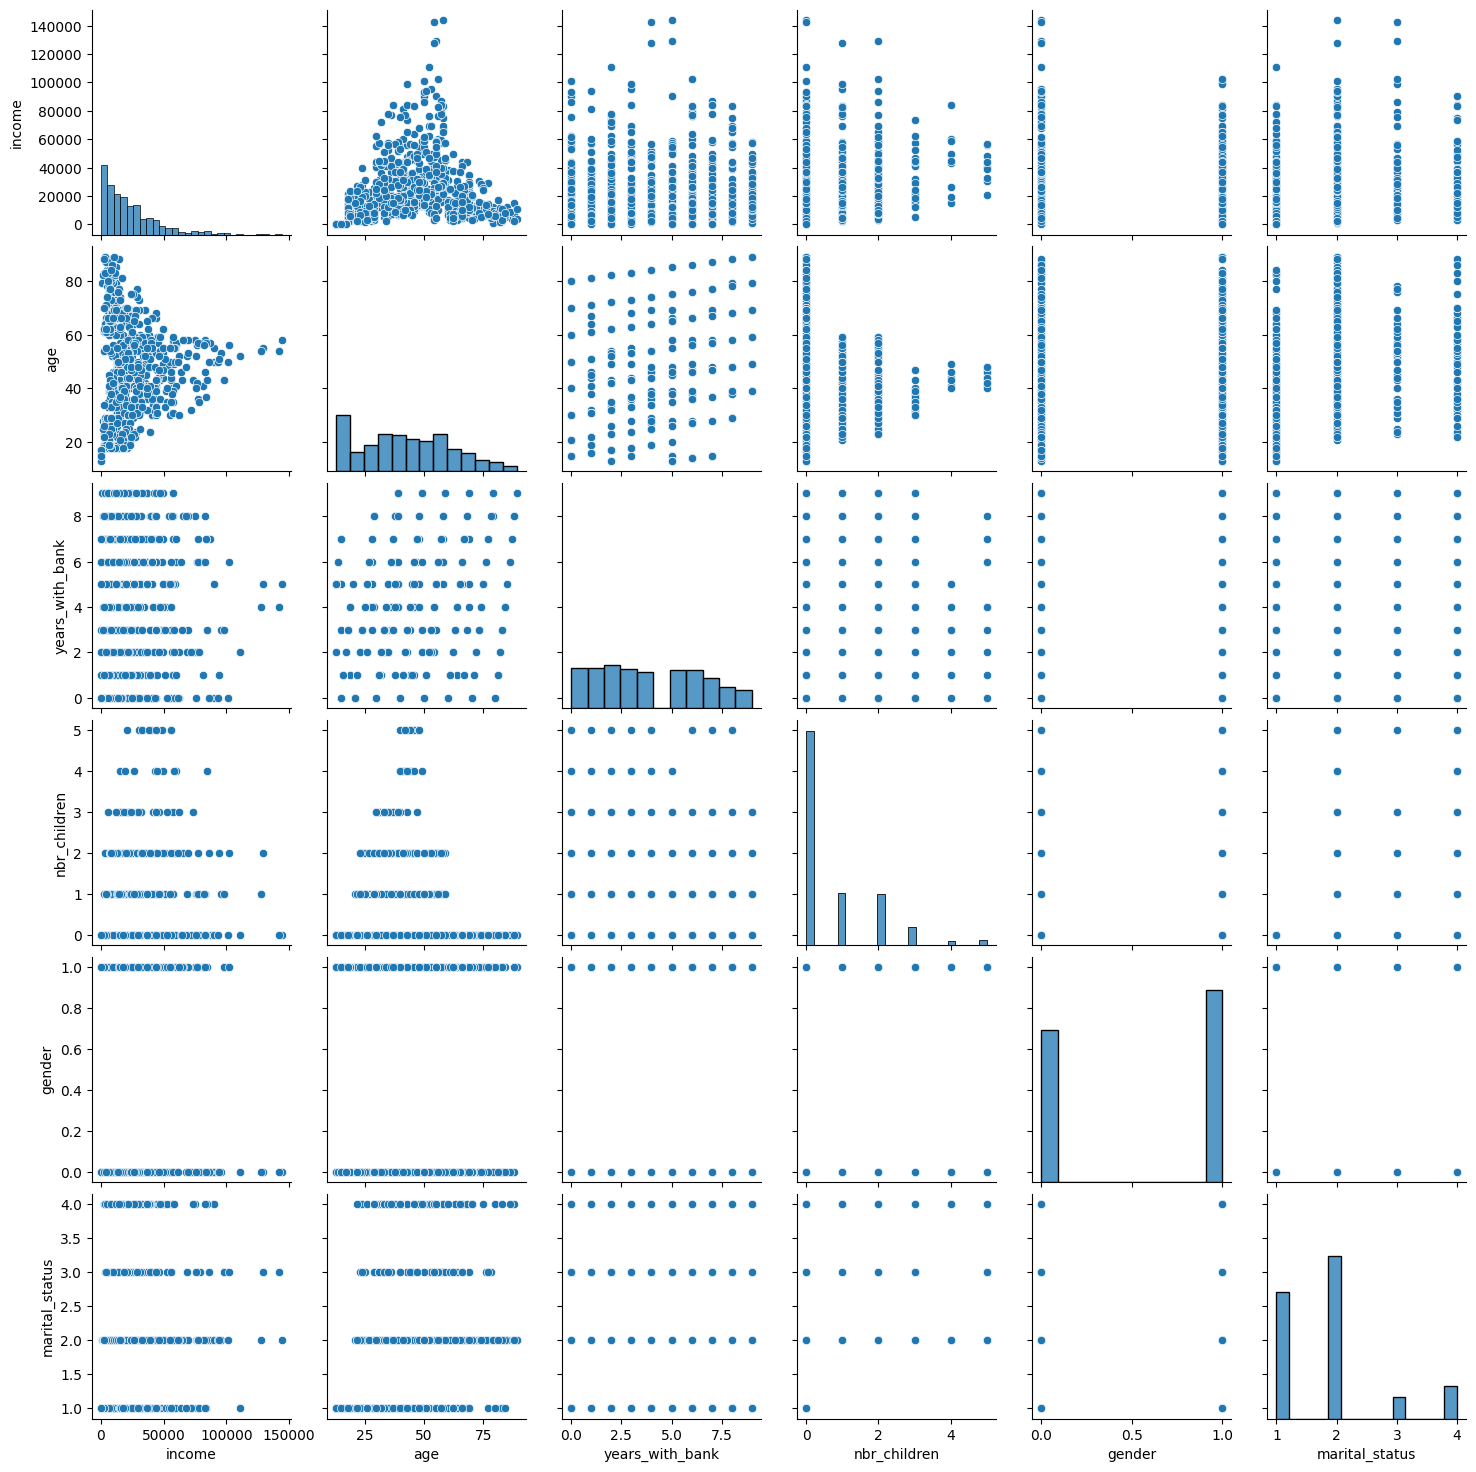

In [12]:
sns.pairplot(customers)

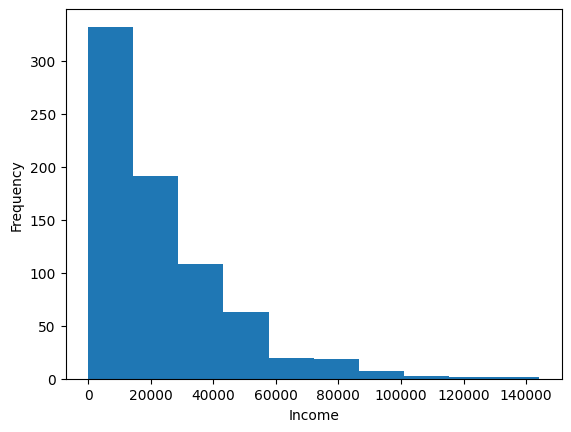

In [13]:
# Create a histogram of the income column
plt.hist(customers['income'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

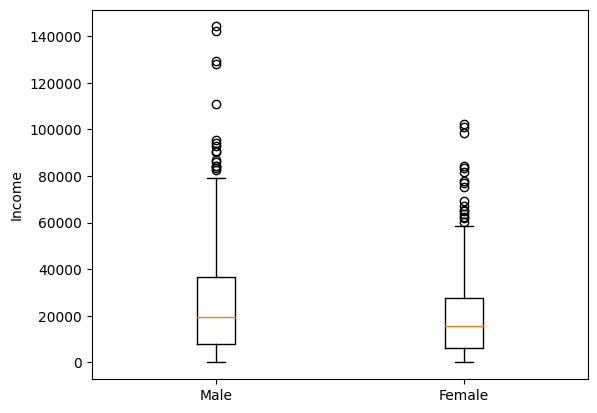

In [14]:
# Create a box plot of income for each gender
data = [customers[customers['gender'] == 0]['income'], customers[customers['gender'] == 1]['income']]
plt.boxplot(data, labels=['Male', 'Female'])
plt.ylabel('Income')
plt.show()

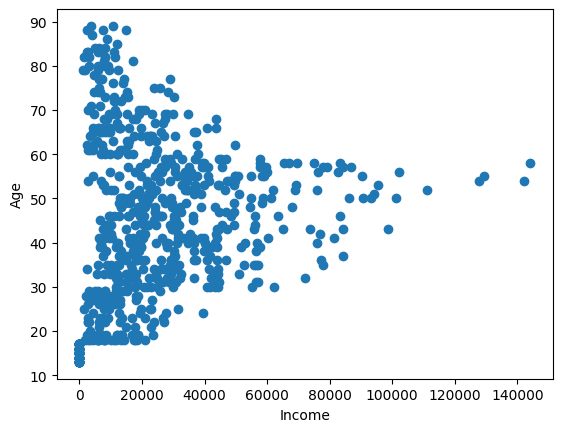

In [15]:
# Create a scatterplot of income vs age
plt.scatter(customers['income'], customers['age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

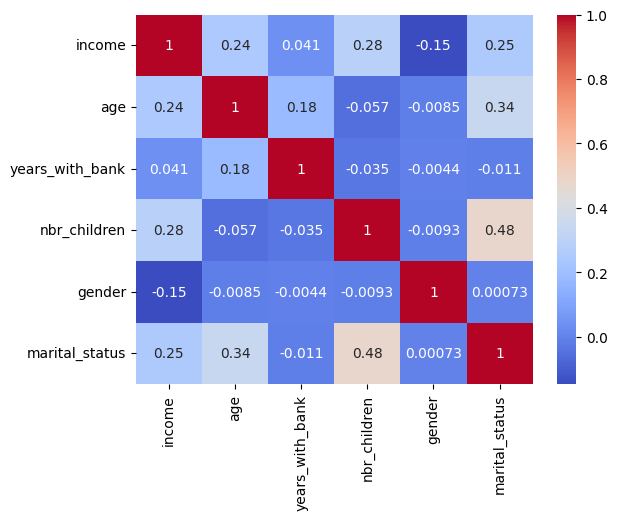

In [16]:
# Create a correlation matrix of the numeric columns in the dataframe
corr_matrix = customers.select_dtypes(include=['float64', 'int64']).corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Data Preparation and Feature Engineering

In [17]:
from sklearn.preprocessing import MinMaxScaler

continuous_columns = ['income', 'age', 'years_with_bank', 'nbr_children']
categorical_columns = ['gender', 'marital_status','state_code_val']

# Create a new DataFrame to store the scaled data
cs_scaled = customers.copy()

# Apply MinMaxScaler to continuous variables
scaler = MinMaxScaler()
cs_scaled[continuous_columns] = scaler.fit_transform(customers[continuous_columns])

# Apply one-hot encoding to categorical variables
cs_scaled = pd.get_dummies(cs_scaled, columns=categorical_columns)

# Display the original and scaled data
cs_scaled.head(15)


,income,age,years_with_bank,nbr_children,gender_0,gender_1,marital_status_1,marital_status_2,marital_status_3,marital_status_4,...,state_code_val_24,state_code_val_25,state_code_val_26,state_code_val_27,state_code_val_28,state_code_val_29,state_code_val_30,state_code_val_31,state_code_val_32,state_code_val_33
0,0.181399,0.434211,0.555556,0.2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.045818,0.763158,0.111111,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.128665,0.328947,0.888889,0.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.330667,0.539474,0.333333,0.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.309066,0.605263,1.000000,0.4,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,0.108798,0.526316,0.333333,0.4,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.000000,0.039474,0.111111,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.013381,0.868421,0.888889,0.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.277073,0.368421,0.111111,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0.066747,0.434211,0.666667,0.2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


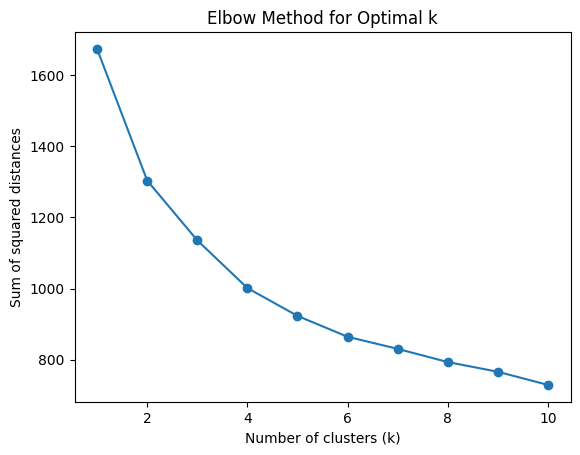

In [18]:
# Calculate the sum of squared distances for different numbers of clusters
sum_of_squared_distances = []
K = range(1, 11)  # Test cluster numbers from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(cs_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, sum_of_squared_distances, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

## So we can choose the numer of clusters = 4 

In [19]:
# Fit KMeans algorithm with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(cs_scaled)
k_labels = kmeans.labels_

# Create a new column in the original dataframe to store the cluster labels
customers.loc[:, "cluster"] = kmeans.labels_

/var/folders/zv/fr0wdk0579q6_dc92zfqx36w0000gn/T/ipykernel_38809/807818343.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.loc[:, "cluster"] = kmeans.labels_


In [20]:
customers.head(10)

,income,age,years_with_bank,nbr_children,gender,marital_status,state_code_val,cluster
0,26150,46,5,1,0,2,23,0
1,6605,71,1,0,0,2,3,0
2,18548,38,8,0,1,1,3,1
3,47668,54,3,0,1,1,3,1
4,44554,59,9,2,1,4,24,2
5,15684,53,3,2,1,2,9,2
6,0,16,1,0,0,1,3,3
7,1929,79,8,0,1,2,8,2
8,39942,41,1,5,1,4,8,2
9,9622,46,6,1,0,2,8,0


# Dimensionality Reduction 

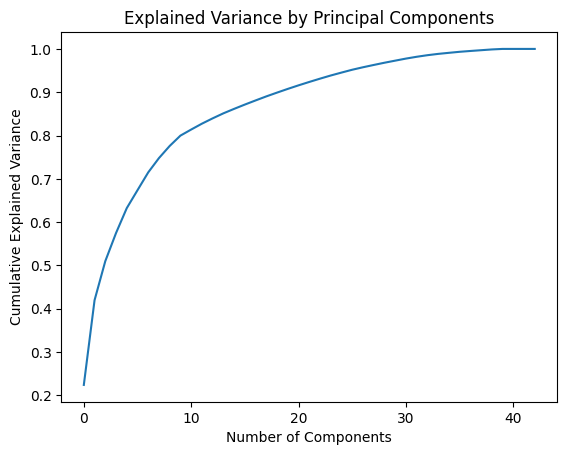

In [21]:
# Initialize PCA and fit to the data
pca = PCA()
pca.fit(cs_scaled)
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance as a function of the number of components
plt.plot(cum_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

## So we choose the number of Components = 20 to get the appox 90% explained variance

# visualize segmentations using scatter plot by using PCA to be able to plot our observations in 2D


<Axes: xlabel='PC1', ylabel='PC2'>

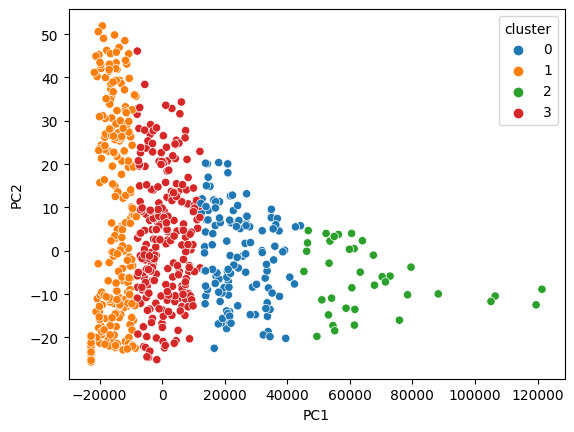

In [33]:
# perform PCA with 2 components
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(customers),columns=['PC1','PC2'])

# separate features from labels
kmeans =KMeans(n_clusters=4 ,n_init=10,random_state=2023).fit(customers)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)

# plot data points colored by cluster label
sns.scatterplot(x="PC1",y="PC2",hue="cluster", data=pca_data)



# Radar charts

/var/folders/zv/fr0wdk0579q6_dc92zfqx36w0000gn/T/ipykernel_37904/635382153.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



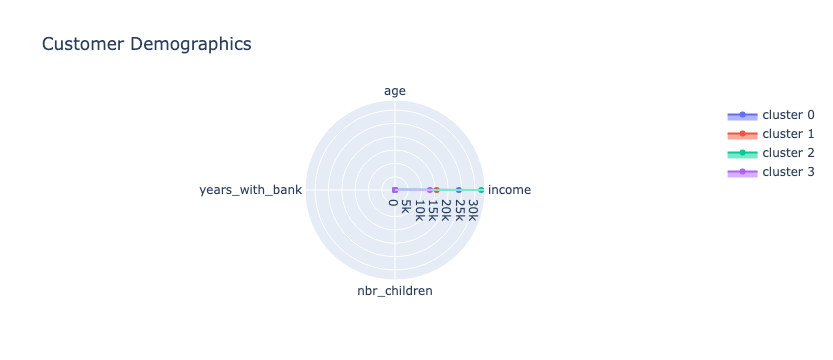

In [41]:
import plotly.graph_objects as go

features = ['income', 'age', 'years_with_bank', 'nbr_children']

# calculate the mean
cluster_means = customers.groupby('cluster').mean().reset_index()

# define the feature name on radare chart
feature_names = ['income', 'age', 'years_with_bank', 'nbr_children']

# create radar charts for each cluster
data = []
for i in range(4):
    data.append(go.Scatterpolar(
        r=cluster_means[feature_names].iloc[i].values,
        theta=feature_names,
        fill='toself',
        name='cluster ' + str(i)
    ))
# define the layout
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, customers[feature_names]]
        )
    ),
    showlegend=True,
    title='Customer Demographics'
)

# display the radar charts
fig = go.Figure(data=data, layout=layout)
fig.show()
